In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
class_c = pd.read_csv('class_c.csv')

In [3]:
inv = pd.read_csv('inventory.csv')

In [4]:
class_c.columns = ['New SKU'] #replacing that column

In [6]:
inv_c = pd.merge(inv,class_c, how='inner', on= 'New SKU')

In [7]:
inv_c.to_csv('inv_cdata.csv')

**Forecast**

In [13]:
inv_c = pd.read_csv("class_cFinal.csv")

In [14]:
inv_c.head()

,week,inv
0,07-02-2019,4.0
1,14-02-2019,2.0
2,21-02-2019,5.0
3,28-02-2019,2.0
4,07-03-2019,2.0


In [15]:
#Convert month into date and time
inv_c['week'] = pd.to_datetime(inv_c['week'])

In [16]:
#week as a index
inv_c.set_index('week', inplace = True)

In [17]:
inv_c.head()

,inv
week,
2019-07-02,4.0
2019-02-14,2.0
2019-02-21,5.0
2019-02-28,2.0
2019-07-03,2.0


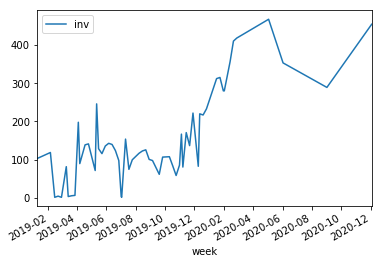

In [18]:
inv_c.plot()
#In the below graph the data doesnot show any seasonality and also its not stationary since there is no trend in the series

In [19]:
#testing for stationary
from statsmodels.tsa.stattools import adfuller

In [20]:
test_result = adfuller(inv_c['inv'])
#adfuller gives 5 different values (ADF Test statistic', 'p-value', 'Lags used', 'Number of observations used)
#it will defined in labels downwards (Dickey-Fuller Test)

In [21]:
#H0 - it is not stationary (null hypothesis)
 #H1 - It is stationary

#if p is less than 0.05, then we can reject the null hypothesis. so it is stationary
def ad_fuller(sales):
    result = adfuller(sales) #it calculates all the relevant 4 values
    labels = ['ADF Test statistic', 'p-value', '#Lags used', 'Number of observations used'] #creating a output
    for value,label in zip(result, labels): #using zip to collect all values result and the labels altogether
        print (label+' : '+str(value) )
    if result[1] <= 0.05:
        print("We reject the null hypothesis. Data is stationary.")
    else:
        print("We can not reject null hypothesis. Data is not stationary")

In [22]:
ad_fuller(inv_c['inv'])

ADF Test statistic : 0.21907410078982376
p-value : 0.9733113384623104
#Lags used : 1
Number of observations used : 56
We can not reject null hypothesis. Data is not stationary


In [23]:
inv_c

,inv
week,
2019-07-02,4.0
2019-02-14,2.0
2019-02-21,5.0
2019-02-28,2.0
2019-07-03,2.0
2019-03-14,4.0
2019-03-21,6.0
2019-03-28,7.0
2019-04-04,198.0


In [24]:
inv_c['inv after first diff.'] = np.log(inv_c['inv']) #doing first order differentiation

In [25]:
#inv_c
ad_fuller(inv_c['inv after first diff.']) #checking now, still data is not stationary.

ADF Test statistic : -2.1217230675835106
p-value : 0.23586983069856127
#Lags used : 0
Number of observations used : 57
We can not reject null hypothesis. Data is not stationary


In [26]:
inv_c['inv after second diff.'] = np.log(inv_c['inv after first diff.'])

In [27]:
inv_c['inv second diff.'] = inv_c['inv after second diff.'] - inv_c['inv after second diff.'].shift(1)

In [29]:
#inv_c
ad_fuller(inv_c['inv second diff.'].dropna())

ADF Test statistic : -11.186365116103898
p-value : 2.429414764638839e-20
#Lags used : 0
Number of observations used : 56
We reject the null hypothesis. Data is stationary.


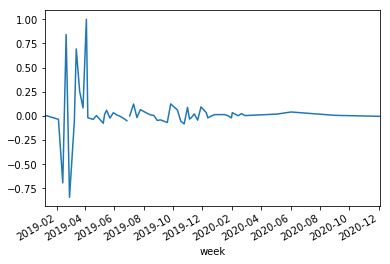

In [31]:
#plot and check
inv_c['inv second diff.'].plot()
plt.figure(figsize = (12,8))

In [32]:
from pandas.plotting import autocorrelation_plot

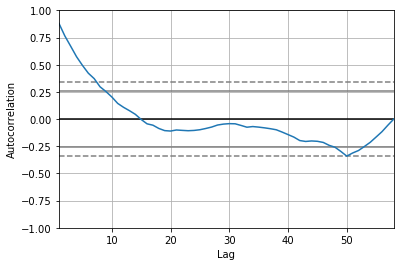

In [33]:
autocorrelation_plot(inv_c['inv'])
plt.show()

In [34]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf #autocorelation or partial auto correlation
import statsmodels.api as sm

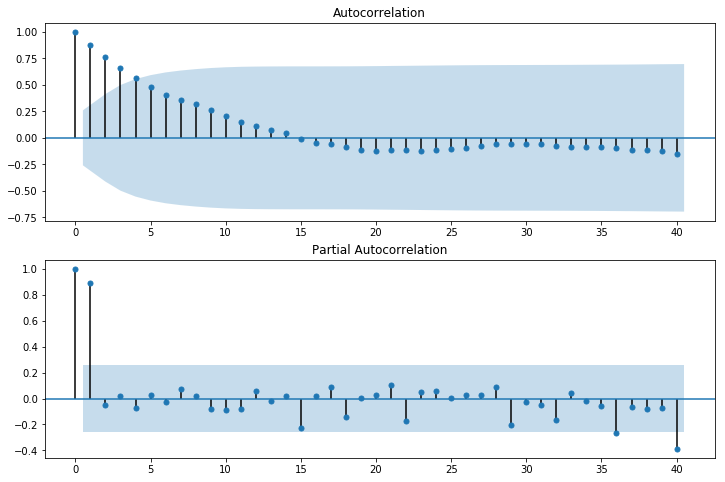

In [35]:
fig = plt.figure(figsize = (12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(inv_c['inv'].iloc[1:], lags = 40, ax = ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(inv_c['inv'].iloc[1:], lags = 40, ax = ax2)
# for ARIMA, we need p,q,d
#p = 1 from partial coorelation FOR AR value
#q = 1 from Auto correlation model (no exponential decrease in 1st graph. so we are more inclined towards auto regressive)1
#d = 0 from differencing done only 1 time

In [36]:
from statsmodels.tsa.arima_model import ARIMA

In [38]:
model = ARIMA(inv_c['inv'], order = (2,0,1)) #(p,d,q)
model_fit = model.fit()

C:\Users\AKASH\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\AKASH\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)
C:\Users\AKASH\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:689: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\AKASH\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:689: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\AKASH\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:690: RuntimeWarning: overflow encountered in ex

In [39]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                    inv   No. Observations:                   58
Model:                     ARMA(2, 1)   Log Likelihood                -293.044
Method:                       css-mle   S.D. of innovations             36.508
Date:                Thu, 02 Apr 2020   AIC                            596.088
Time:                        16:45:53   BIC                            606.390
Sample:                             0   HQIC                           600.101
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        199.6226     83.466      2.392      0.017      36.033     363.212
ar.L1.inv      1.9717      0.027     73.130      0.000       1.919       2.025
ar.L2.inv     -0.9739      0.026    -37.880      0.000      -1.024      -0.924
ma.L1.inv     -1.0000      0.045    -22.395      0.000      -1.088      -0.912
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0123           -0.0454j            1.0133           -0.0071
AR.2            1.0123           +0.0454j            1.0133            0.0071
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

In [40]:
inv_c.tail(15)

,inv,inv after first diff.,inv after second diff.,inv second diff.
week,,,,
2019-05-12,246.0,5.505332,1.705717,0.018822
2019-12-12,220.0,5.393628,1.685218,-0.020499
2019-12-19,217.0,5.379897,1.682669,-0.002549
2019-12-26,233.0,5.451038,1.695806,0.013137
2020-02-01,280.0,5.634790,1.728960,0.033154
2020-09-01,289.0,5.666427,1.734559,0.005599
2020-01-16,312.0,5.743003,1.747982,0.013424
2020-01-23,315.0,5.752573,1.749647,0.001665
2020-01-30,280.0,5.634790,1.728960,-0.020687


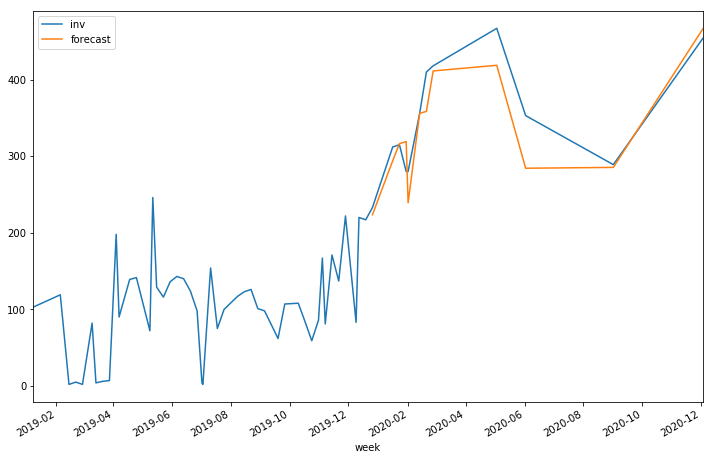

In [41]:
inv_c['forecast']=model_fit.predict(start='2019-12-26',end='2020-12-03')
inv_c[['inv','forecast']].plot(figsize=(12,8))

**Metrics**

In [43]:
farima = inv_c['forecast']['2019-12-26' : ]
actual = inv_c['inv']['2019-12-26' :]

In [81]:
actual

week
2019-12-26    233.0
2020-02-01    280.0
2020-09-01    289.0
2020-01-16    312.0
2020-01-23    315.0
2020-01-30    280.0
2020-06-02    353.0
2020-02-13    356.0
2020-02-20    410.0
2020-02-27    418.0
2020-05-03    467.0
2020-12-03    454.0
Name: inv, dtype: float64

In [82]:
farima

week
2019-12-26    223.578538
2020-02-01    239.222986
2020-09-01    285.395137
2020-01-16    294.017255
2020-01-23    316.419954
2020-01-30    319.073570
2020-06-02    284.294402
2020-02-13    355.959150
2020-02-20    358.543976
2020-02-27    411.338188
2020-05-03    418.742288
2020-12-03    466.487785
Name: forecast, dtype: float64

In [44]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(actual, farima)
mae = mean_absolute_error(actual, farima)
print('Mean Squared Error of Amberville Brand Using Arima: %f' % mse)
print('Mean Absolute Error of Amberville Brand Using Arima: %f' % mae)

Mean Squared Error of Amberville Brand Using Arima: 1126.164807
Mean Absolute Error of Amberville Brand Using Arima: 24.990782


**6 Months**

In [45]:
# multi-step out-of-sample forecast
forecast = model_fit.forecast(steps=24)[0]

In [46]:
class_c_outofsample = pd.DataFrame(data=forecast, columns=['Forecast']) #putting into dataframe

In [47]:
class_c_outofsample

,Forecast
0,453.278395
1,452.028379
2,450.266446
3,448.009764
4,445.276117
5,442.083857
6,438.451845
7,434.399398
8,429.946236
9,425.112429


**The End**